# **ABOUT DATASET**
# Context
A supermarket is a self-service shop offering a wide variety of food, beverages and household products, organized into sections. This kind of store is larger and has a wider selection than earlier grocery stores, but is smaller and more limited in the range of merchandise than a hypermarket or big-box market. In everyday U.S. usage, however, "grocery store" is synonymous with supermarket, and is not used to refer to other types of stores that sell groceries.

# Content
In the dataset, You'll get data of different stores of a supermarket company as per their store IDs which for ease has been converted to positive integers.

Store ID: (Index) ID of the particular store.

Store_Area: Physical Area of the store in yard square.

Items_Available: Number of different items available in the corresponding store.

DailyCustomerCount: Number of customers who visited to stores on an average over month.

Store_Sales: Sales in (US $) that stores made.

# Acknowledgement
The data is obtained from the project from the University after seeking proper permission.

# Inspiration
Analyzing the performances of stores in the past on basis of which will try to rectify defects as well as to leverage the positives. Who doesn't want to increase their profits right?

In [2]:
# Importing the necessary libraraies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [3]:
# Importing the dataset
data = pd.read_csv('/content/Stores.csv')
data.head(10)

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
5,6,1442,1733,760,45260
6,7,1542,1858,1030,72240
7,8,1261,1507,1020,37720
8,9,1090,1321,680,46310
9,10,1030,1235,1130,44150


# **DATA EXPLORATORY ANALYSIS**

In [4]:
# Checking the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


In [5]:
# checking if there is any missing data
data.isnull().sum()

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [6]:
# checking the correlation of the dataset
data.corr()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
Store ID,1.000000,-0.058705,-0.055707,-0.010029,0.071486
Store_Area,-0.058705,1.000000,0.998891,-0.041423,0.097474
Items_Available,-0.055707,0.998891,1.000000,-0.040978,0.098849
Daily_Customer_Count,-0.010029,-0.041423,-0.040978,1.000000,0.008629
Store_Sales,0.071486,0.097474,0.098849,0.008629,1.000000


In [7]:
# checking the stsatistical summary of the dataset
data.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


In [8]:
# iterating the columns
for col in data.columns:
    print(col)

Store ID 
Store_Area
Items_Available
Daily_Customer_Count
Store_Sales


In [9]:
# Remove column name 'Store ID'

column=['Store ID ']
data.drop(column, inplace=True, axis=1)

In [10]:
data.head()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1659,1961,530,66490
1,1461,1752,210,39820
2,1340,1609,720,54010
3,1451,1748,620,53730
4,1770,2111,450,46620


# **DATA VISULAIZATION**

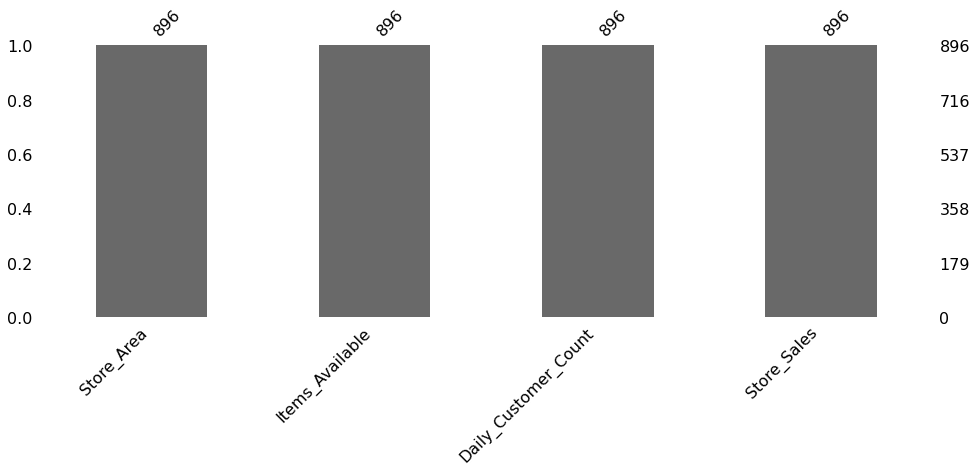

In [11]:
# Viasualization of the featurs unsing Bar plot to see if there is any missing data

msno.bar(data, figsize = (16,5))
plt.show()

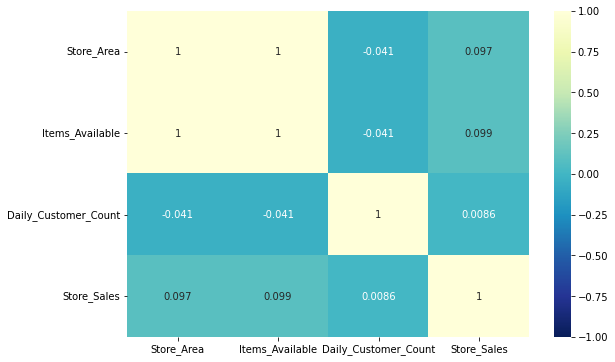

In [12]:
# plotting the heat map graph to see the correlation of the data in graphs 
plt.figure(figsize=(9,6))
sns.heatmap(data.corr(), vmin=-1, annot=True, cmap='YlGnBu_r')

[]

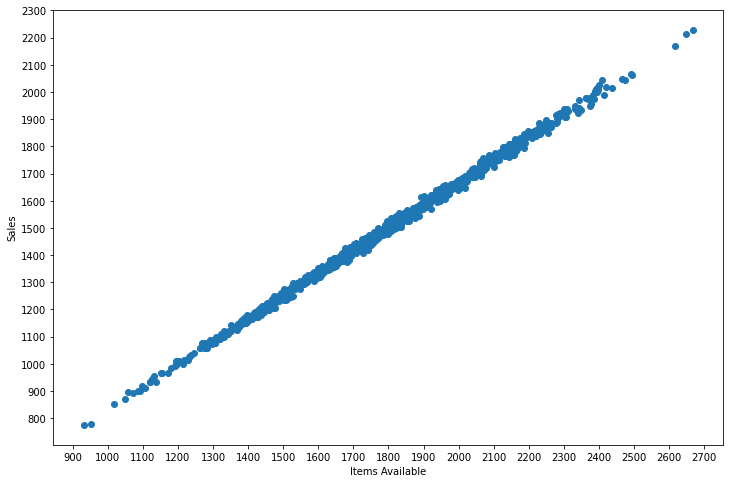

In [14]:
# scattered plot for items availabel and store area...

x = data[['Items_Available']]
y = data[['Store_Area']]
_ = plt.figure(figsize=(12,8))  
_ = plt.scatter(x , y)
_ = plt.xlabel('Items Available')
_ = plt.ylabel('Sales')
_ = plt.xticks(np.arange(0, 3000 , step = 100)) 
_ = plt.yticks(np.arange(0 ,3000 , step = 100))
plt.plot()

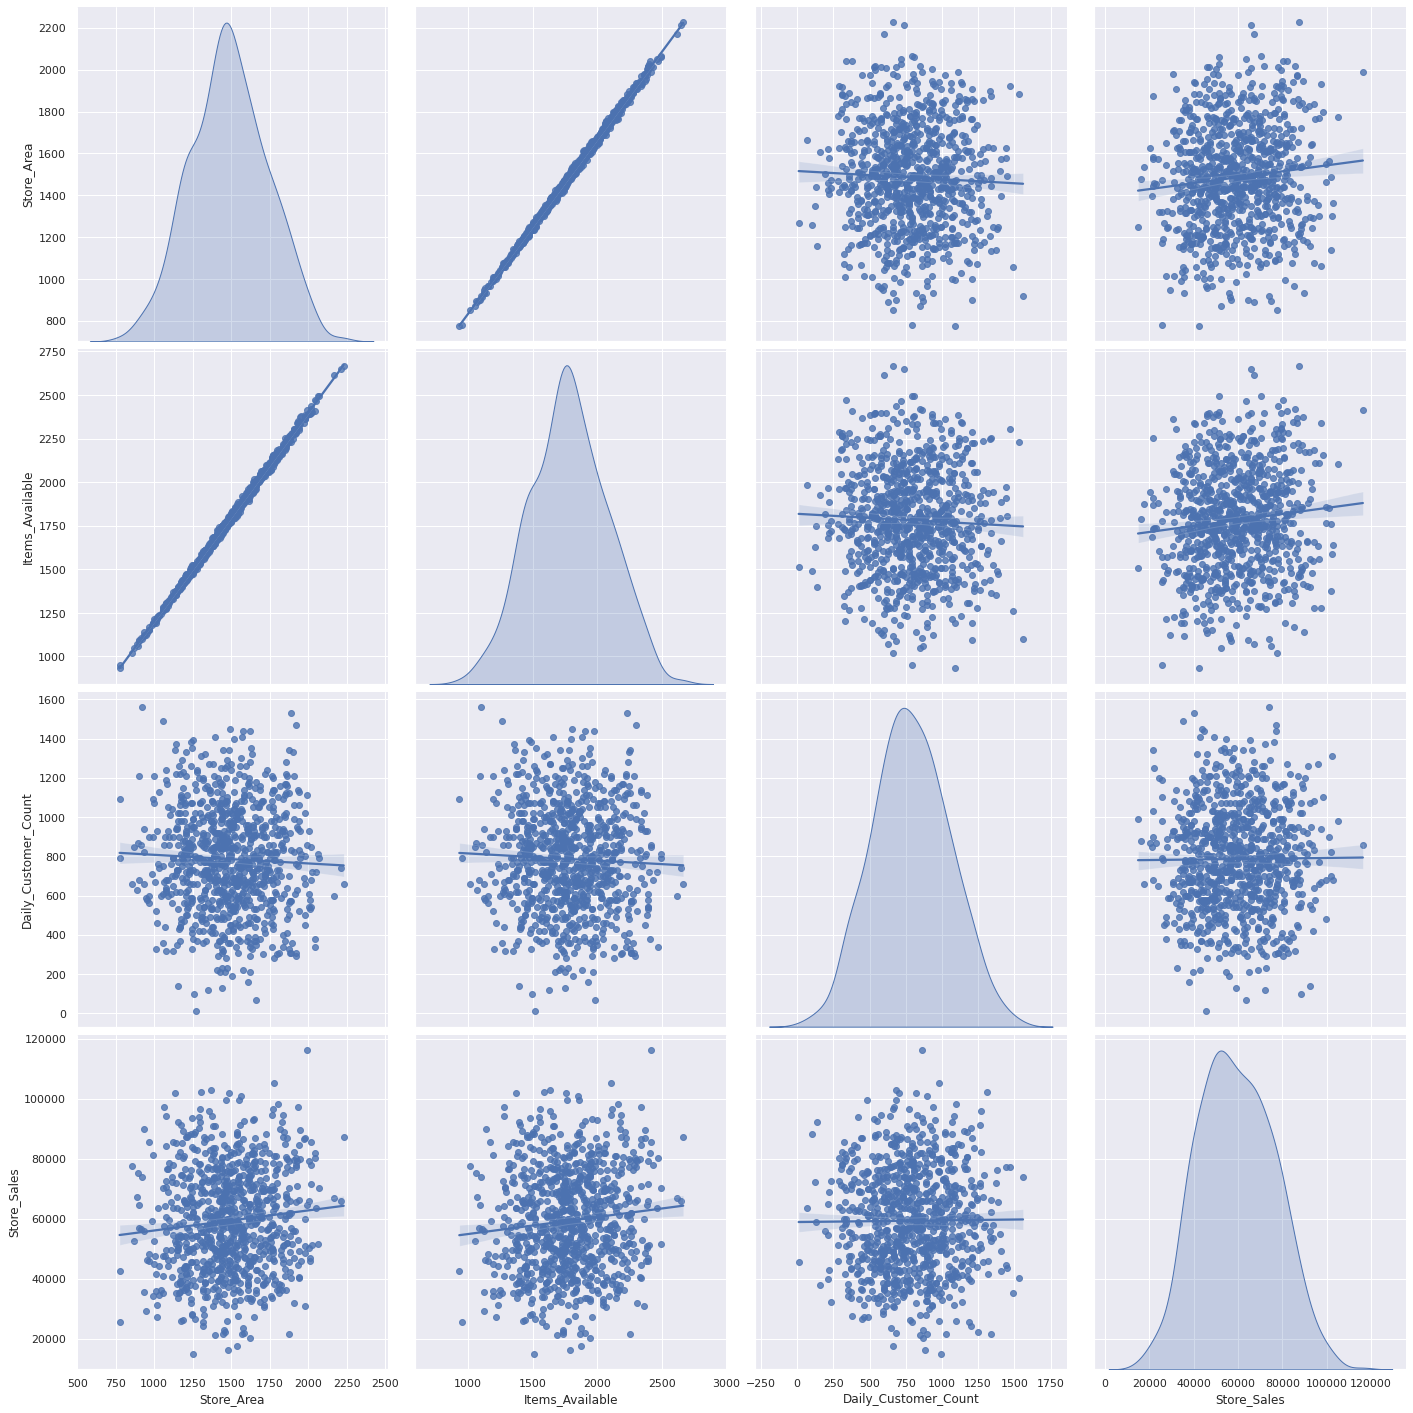

In [15]:
# pairplot plot of the whole feaures on the dataset 
sns.set()
sns.pairplot(data,height = 5 ,kind ='reg',diag_kind='kde')
plt.show()

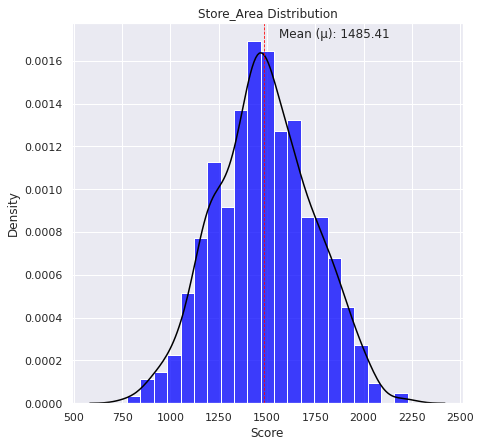

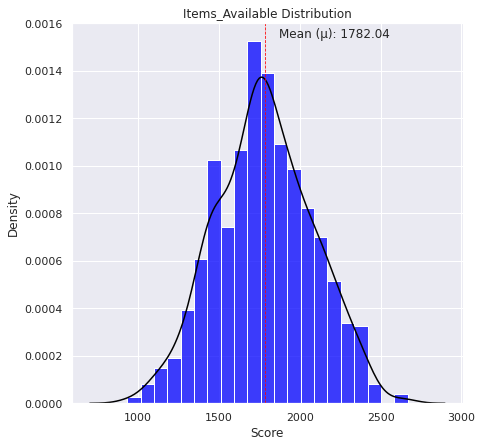

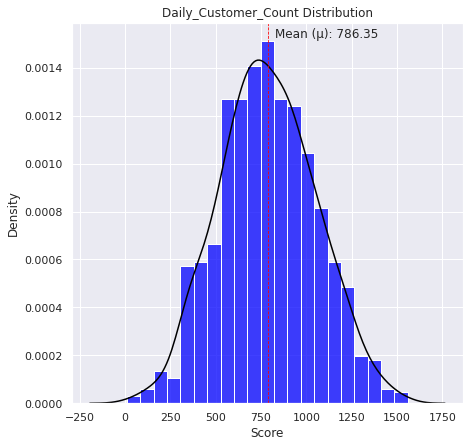

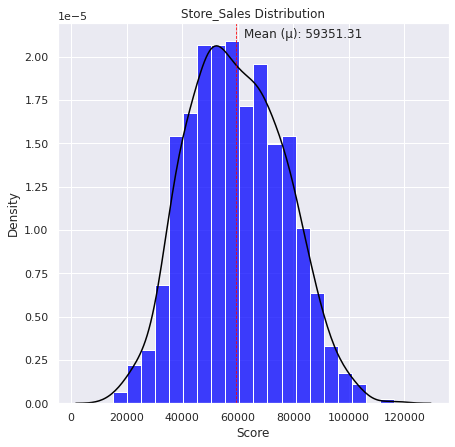

In [ ]:
# histogram plot to visulaize the distribution of all the feautures on the dataset
for column_name in data.columns:
  plt.figure(figsize=(7, 7))
  plt.title("{column_name} Distribution".format(column_name = column_name))
  sns.histplot(data[column_name], stat='density',color='blue')
  sns.kdeplot(data[column_name], color='black')
  plt.axvline(data[column_name].mean(), color='red', linestyle='--', linewidth=0.8)
  min_ylim, max_ylim = plt.ylim()
  plt.text(data[column_name].mean()*1.05, max_ylim*0.96, 'Mean (μ): {:.2f}'.format(data[column_name].mean()))
  plt.xlabel("Score")
  plt.ylabel("Density")
  plt.show()